<a href="https://colab.research.google.com/github/MinJunJA/babymodel/blob/master/svm%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa

In [ ]:
import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import librosa

# 오디오 파일 불러오기
audio_path = '/content/hug_1.wav'
y, sr = librosa.load(audio_path, sr=16000)  # sr=None로 설정하면 원본 sampling rate 유지


In [ ]:
y, sr = librosa.load('/content/hug_6.wav', sr=44100)

In [ ]:
y, sr = librosa.load(audio_path, sr=16000)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (239630,)
length: 14.976875 secs


Text(0.5, 1.0, 'Power spectrum')

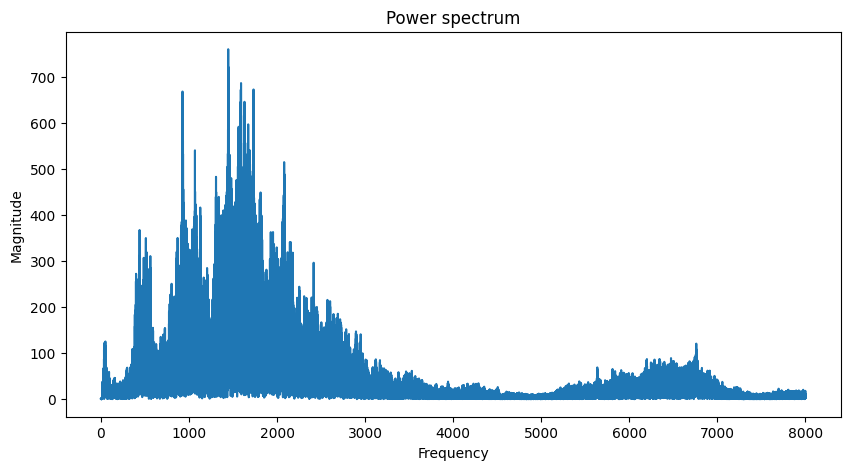

In [ ]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
n_fft = 2048
hop_length = 512

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[0.1702486  0.07662844 0.01100577 ... 0.004874   0.2597011  0.5277444 ]
 [0.15502125 0.1033811  0.03180239 ... 0.02230714 0.27755317 0.5072564 ]
 [0.18725075 0.01335756 0.0813046  ... 0.17408685 0.14952424 0.47384846]
 ...
 [0.01779885 0.01654235 0.01747384 ... 0.16647068 0.05857754 0.07687133]
 [0.01523977 0.02448112 0.02820222 ... 0.39809588 0.26865876 0.19886146]
 [0.00130969 0.02680792 0.0277981  ... 0.52774197 0.50837433 0.27282283]]


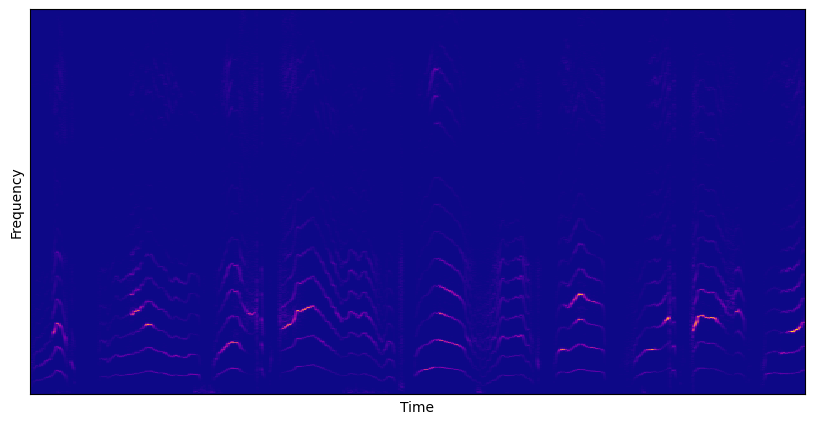

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

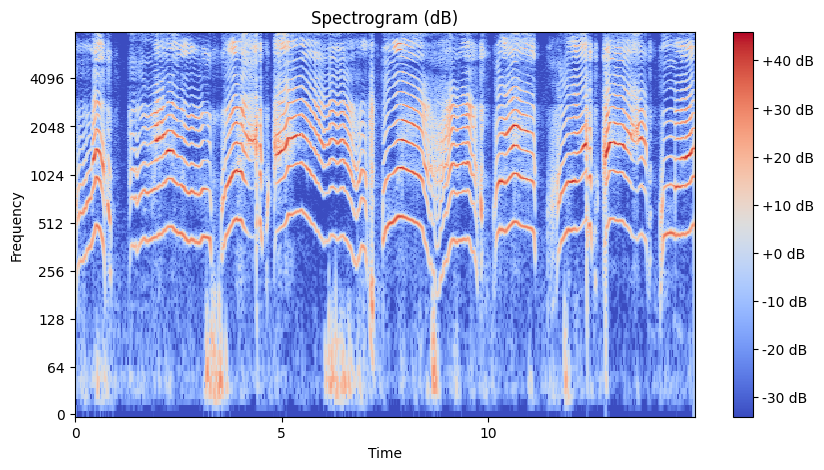

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
samples, sample_rate = librosa.load('/content/hug_6.wav', sr=44100)

44100

In [ ]:
import librosa

# 오디오 파일 불러오기
file_path = '/content/hug_6.wav'
y, sr = librosa.load(file_path, sr=None)  # sr=None로 설정하면 원본 sampling rate 유지

# 샘플링 레이트 변경 (예: 16kHz로 설정)
new_sr = 16000
y_resampled = librosa.resample(y, sr, new_sr)

16000

In [ ]:
n_mfcc = 12  # 원하는 MFCC 계수 개수 (일반적으로 12-13개 사용)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

In [ ]:
mfccs

array([[-120.1301  , -113.45139 ,  -97.29327 , ..., -151.08377 ,
        -163.13544 , -208.07724 ],
       [ -34.990005,  -55.961193,  -50.868793, ...,  153.7594  ,
         137.6219  ,  127.3188  ],
       [ -49.64332 ,  -46.01235 ,  -59.51825 , ..., -114.573654,
         -98.65805 ,  -66.47281 ],
       ...,
       [  14.364009,   16.810783,   19.925648, ...,   21.976559,
          22.543617,   19.194183],
       [ -14.467098,  -17.26116 ,  -16.392363, ...,    6.649642,
          15.202631,   17.860489],
       [  27.269398,   28.157814,   29.872875, ...,   29.372467,
          15.502472,   13.821869]], dtype=float32)

In [ ]:
# 예시: 음량 정규화
y_normalized = librosa.util.normalize(y)

# 예시: 특정 주파수 대역 추출
y_filtered = librosa.effects.bandpass(y, fmin=500, fmax=2000)

array([-0.01970015, -0.02239013, -0.03097433, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [ ]:
import librosa
import numpy as np

# 음성 파일 불러오기
file_path = '/content/hug_6.wav'
y, sr = librosa.load(file_path, sr=None)  # sr=None로 설정하면 원본 sampling rate 유지

# MFCC 계산
n_mfcc = 13  # 원하는 MFCC 계수 개수 (일반적으로 12-13개 사용)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# 결과 출력
print("MFCC 벡터:")
print(mfccs)

MFCC 벡터:
[[-120.1301    -113.45139    -97.29327   ... -151.08377   -163.13544
  -208.07724  ]
 [ -34.990005   -55.961193   -50.868793  ...  153.7594     137.6219
   127.3188   ]
 [ -49.64332    -46.01235    -59.51825   ... -114.573654   -98.65805
   -66.47281  ]
 ...
 [ -14.467098   -17.26116    -16.392363  ...    6.649642    15.202631
    17.860489 ]
 [  27.269398    28.157814    29.872875  ...   29.372467    15.502472
    13.821869 ]
 [   7.1716046    9.235882    11.280518  ...    0.7805444   -9.077723
   -12.121742 ]]


In [ ]:
pip install librosa scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install numpy librosa scikit-learn pandas

In [ ]:
#SVM
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 13

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)  # mfccs.T가 아닌 mfccs를 추가
        labels.append(label)

# 레이블을 정수로 변환
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

print("X_train shape before reshape:", X_train.shape)

# X_train의 형태가 (num_samples, num_features) 형태로 평탄화되도록 reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X_train shape after reshape:", X_train.shape)

# SVM 모델 학습
svm_model = SVC(kernel='linear')  # 선형 커널 사용
svm_model.fit(X_train, y_train)

# 예측
y_pred = svm_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

X_train shape before reshape: (626, 2270, 13)
X_train shape after reshape: (626, 29510)
Accuracy: 0.49044585987261147


In [ ]:
#MLP

import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 13

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# MLP 모델 생성
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # 클래스 수에 맞는 활성화 함수

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)


16000

In [ ]:
#cnn
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 13

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


#모델생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) #padding = 'same'을 넣지 않으면 다운 샘플링을 시도하여 모델이 돌아가지 않음
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

<ipython-input-2-fc6ff7664199>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


Epoch 1/50
18/18 [==============================] - 24s 1s/step - loss: 9.5208 - accuracy: 0.2718 - val_loss: 1.5573 - val_accuracy: 0.3333
Epoch 2/50
18/18 [==============================] - 23s 1s/step - loss: 1.4759 - accuracy: 0.3446 - val_loss: 1.4845 - val_accuracy: 0.3651
Epoch 3/50
18/18 [==============================] - 21s 1s/step - loss: 1.3516 - accuracy: 0.4334 - val_loss: 1.4108 - val_accuracy: 0.3333
Epoch 4/50
18/18 [==============================] - 23s 1s/step - loss: 1.2073 - accuracy: 0.5009 - val_loss: 1.3854 - val_accuracy: 0.5238
Epoch 5/50
18/18 [==============================] - 21s 1s/step - loss: 1.0425 - accuracy: 0.5702 - val_loss: 1.3941 - val_accuracy: 0.4286
Epoch 6/50
18/18 [==============================] - 24s 1s/step - loss: 0.8884 - accuracy: 0.6483 - val_loss: 1.2773 - val_accuracy: 0.4762
Epoch 7/50
18/18 [==============================] - 23s 1s/step - loss: 0.7404 - accuracy: 0.7052 - val_loss: 1.4970 - val_accuracy: 0.4921
Epoch 8/50
18/18 [==

In [ ]:
#rnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 13

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


#모델생성
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

<ipython-input-23-d02f508ebf07>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


Epoch 1/10
18/18 [==============================] - 57s 3s/step - loss: 1.6091 - accuracy: 0.1936 - val_loss: 1.6111 - val_accuracy: 0.1587
Epoch 2/10
18/18 [==============================] - 55s 3s/step - loss: 1.6101 - accuracy: 0.2060 - val_loss: 1.6097 - val_accuracy: 0.1587
Epoch 3/10
18/18 [==============================] - 54s 3s/step - loss: 1.6074 - accuracy: 0.2078 - val_loss: 1.6103 - val_accuracy: 0.1587
Epoch 4/10
18/18 [==============================] - 53s 3s/step - loss: 1.6070 - accuracy: 0.2202 - val_loss: 1.6108 - val_accuracy: 0.1587
Epoch 5/10
18/18 [==============================] - 54s 3s/step - loss: 1.6073 - accuracy: 0.1989 - val_loss: 1.6117 - val_accuracy: 0.2063
Epoch 6/10
18/18 [==============================] - 63s 4s/step - loss: 1.6077 - accuracy: 0.2025 - val_loss: 1.6126 - val_accuracy: 0.1587
Epoch 7/10
18/18 [==============================] - 54s 3s/step - loss: 1.6060 - accuracy: 0.2149 - val_loss: 1.6118 - val_accuracy: 0.1587
Epoch 8/10
18/18 [==

In [ ]:
#CRNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 13

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

#모델생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Reshape((X_train.shape[1] // 8, (X_train.shape[2] // 8) * 128)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

<ipython-input-27-e5dc24903874>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


Epoch 1/10
18/18 [==============================] - 41s 2s/step - loss: 1.6100 - accuracy: 0.2096 - val_loss: 1.6113 - val_accuracy: 0.1587
Epoch 2/10
18/18 [==============================] - 34s 2s/step - loss: 1.6089 - accuracy: 0.1794 - val_loss: 1.6082 - val_accuracy: 0.1587
Epoch 3/10
18/18 [==============================] - 34s 2s/step - loss: 1.6080 - accuracy: 0.2149 - val_loss: 1.6120 - val_accuracy: 0.1587
Epoch 4/10
18/18 [==============================] - 36s 2s/step - loss: 1.6085 - accuracy: 0.2149 - val_loss: 1.6115 - val_accuracy: 0.1587
Epoch 5/10
18/18 [==============================] - 34s 2s/step - loss: 1.6067 - accuracy: 0.2149 - val_loss: 1.6122 - val_accuracy: 0.1587
Epoch 6/10
18/18 [==============================] - 34s 2s/step - loss: 1.6062 - accuracy: 0.2149 - val_loss: 1.6118 - val_accuracy: 0.1587
Epoch 7/10
18/18 [==============================] - 35s 2s/step - loss: 1.6064 - accuracy: 0.2149 - val_loss: 1.6118 - val_accuracy: 0.1587
Epoch 8/10
18/18 [==

In [ ]:
!pip install pydub

from pydub import AudioSegment
import os

# 폴더 경로 설정
folders = [
    {"input": "/content/drive/MyDrive/babycrying/awake", "output": "/content/drive/MyDrive/babycrying/awake1"},
    {"input": "/content/drive/MyDrive/babycrying/hug", "output": "/content/drive/MyDrive/babycrying/hug1"},
    {"input": "/content/drive/MyDrive/babycrying/hungry", "output": "/content/drive/MyDrive/babycrying/hungry1"},
    {"input": "/content/drive/MyDrive/babycrying/sleepy", "output": "/content/drive/MyDrive/babycrying/sleepy1"},
    {"input": "/content/drive/MyDrive/babycrying/uncomfortable", "output": "/content/drive/MyDrive/babycrying/uncomfortable1"}
]

# FFmpeg 설치 (Google Colab 환경에 맞게)
!apt-get -qq install -y ffmpeg

# 각 폴더의 WAV 파일들을 3초 단위로 자르기
for folder in folders:
    input_folder = folder["input"]
    output_folder = folder["output"]

    # 입력 폴더의 WAV 파일 목록 가져오기
    wav_files = [f for f in os.listdir(input_folder) if f.endswith(".wav")]

    for wav_file in wav_files:
        input_path = os.path.join(input_folder, wav_file)
        sound = AudioSegment.from_wav(input_path)

        duration = len(sound)
        start_time = 0
        end_time = 3000  # 3초

        count = 1
        while end_time <= duration:
            output_path = os.path.join(output_folder, f"{os.path.splitext(wav_file)[0]}_{count}.wav")
            segment = sound[start_time:end_time]
            segment.export(output_path, format="wav")

            start_time += 3000
            end_time += 3000
            count += 1

print("작업이 완료되었습니다.")


작업이 완료되었습니다.


In [ ]:
import os

folder_path = "/content/drive/MyDrive/babycrying/awake1"
file_list = os.listdir(folder_path)
file_count = len(file_list)
print(file_count)

886


In [ ]:
import os

folder_path = "/content/drive/MyDrive/babycrying/hug1"
file_list = os.listdir(folder_path)
file_count = len(file_list)
print(file_count)

946


In [ ]:
import os

folder_path = "/content/drive/MyDrive/babycrying/hungry1"
file_list = os.listdir(folder_path)
file_count = len(file_list)
print(file_count)

882


In [ ]:
import os

folder_path = "/content/drive/MyDrive/babycrying/sleepy1"
file_list = os.listdir(folder_path)
file_count = len(file_list)
print(file_count)

762


In [ ]:
import os

folder_path = "/content/drive/MyDrive/babycrying/uncomfortable1"
file_list = os.listdir(folder_path)
file_count = len(file_list)
print(file_count)

788


In [ ]:
#cnn
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 13

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


#모델생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) #padding = 'same'을 넣지 않으면 다운 샘플링을 시도하여 모델이 돌아가지 않음
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

FileNotFoundError: ignored